In [1]:
import os
import warnings
import cv2
import keras
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
from PIL import Image
from keras import models, layers, optimizers
from keras.applications import VGG16
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.preprocessing import image as image_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#% matplotlib inline
style.use('seaborn-whitegrid')
warnings.filterwarnings(action='once')

In [2]:

gestures = {'L_': 'L',
           'fi': 'Fist',
           'C_': 'C',
           'ok': 'Okay',
           'pe': 'Peace',
           'pa': 'Palm'
            }

gestures_map = {'Fist' : 0,
                'L': 1,
                'Okay': 2,
                'Palm': 3,
                'Peace': 4
                }

In [3]:
def process_image(path):
    img = Image.open(path)
    img = img.resize((224, 224))
    img = np.array(img)
    return img

def process_data(X_data, y_data):
    X_data = np.array(X_data, dtype = 'float32')
    if rgb:
        pass
    else:
        X_data = np.stack((X_data,)*3, axis=-1)
    X_data /= 255
    y_data = np.array(y_data)
    y_data = to_categorical(y_data)
    return X_data, y_data

def walk_file_tree(relative_path):
    X_data = []
    y_data = [] 
    for directory, subdirectories, files in os.walk(relative_path):
        for file in files:
            if not file.startswith('.') and (not file.startswith('C_')):
                path = os.path.join(directory, file)
                print('gestures',gestures)
                gesture_name = gestures[file[0:2]]
                print('gesture name',gesture_name)
                y_data.append(gestures_map[gesture_name])
                X_data.append(process_image(path))   

            else:
                continue

    X_data, y_data = process_data(X_data, y_data)
    return X_data, y_data

In [4]:
class Data(object):
    def __init__(self):
        self.X_data = []
        self.y_data = []

    def get_data(self):
        return self.X_data, self.y_data

In [5]:
relative_path = 'C:\\Users\\User\\Desktop\\Gesture\\Project\\tr'
rgb = False

# # This method processes the data
X_data, y_data = walk_file_tree(relative_path)

# Can also optionally use a class to get this data, in order to keep it separate from Drawing data
silhouette = Data()
silhouette.X_data, silhouette.y_data = walk_file_tree(relative_path)

gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C

gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name Fist
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name L
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C', 'ok': 'Okay', 'pe': 'Peace', 'pa': 'Palm'}
gesture name L
gestures {'L_': 'L', 'fi': 'Fist', 'C_': 'C

In [6]:
print(f'X_data shape: {X_data.shape}')
print(f'y_data shape: {y_data.shape}')

X_data shape: (101, 224, 224, 3)
y_data shape: (101, 5)


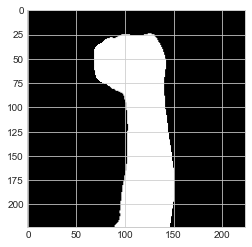

In [7]:
plt.imshow(X_data[0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state=12, stratify=y_data)

In [9]:
file_path = 'saved_model.hdf5'
model_checkpoint = ModelCheckpoint(filepath=file_path, save_best_only=True)

early_stopping = EarlyStopping(monitor='val_acc',
                               min_delta=0,
                               patience=10,
                               verbose=1,
                               mode='auto',
                               restore_best_weights=True)

In [ ]:
imageSize = 224
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(imageSize, imageSize, 3))
optimizer1 = optimizers.Adam()

base_model = vgg_base  # Topless
# Add top layer
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x)
x = Dense(128, activation='relu', name='fc3')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu', name='fc4')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Train top layers only
for layer in base_model.layers:
    layer.trainable = False

callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_train, y_train), verbose=1,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/5
8/8 [==============================] - 33s 4s/step - loss: 1.9981 - accuracy: 0.2765 - val_loss: 1.5052 - val_accuracy: 0.2625
Epoch 2/5
8/8 [==============================] - 38s 5s/step - loss: 1.9512 - accuracy: 0.3426 - val_loss: 1.0631 - val_accuracy: 0.5750
Epoch 3/5
8/8 [==============================] - 37s 5s/step - loss: 1.3006 - accuracy: 0.4478 - val_loss: 0.8596 - val_accuracy: 0.6375
Epoch 4/5
8/8 [==============================] - 45s 6s/step - loss: 0.9874 - accuracy: 0.6550 - val_loss: 0.5403 - val_accuracy: 0.8875
Epoch 5/5
6/8 [=====================>........] - ETA: 5s - loss: 0.7002 - accuracy: 0.7981

In [11]:
model.save('gestmodel.h5')

In [12]:
from keras.models import load_model
model = load_model('gestmodel.h5')

In [13]:
def get_classification_metrics(X_test, y_test):
    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    print(confusion_matrix(y_true, pred))
    print('\n')
    print(classification_report(y_true, pred))

In [14]:
gesture_names = {0: 'Fist',
                 1: 'L',
                 2: 'Okay',
                 3: 'Palm',
                 4: 'Peace'}

def predict_rgb_image(path):
    img2rgb = image_utils.load_img(path=path, target_size=(224, 224))
    img2rgb = image_utils.img_to_array(img2rgb)
    img2rgb = img2rgb.reshape(1, 224, 224, 3)
    return gesture_names[np.argmax(model.predict(img2rgb))]

In [15]:
from PIL import Image
predict_rgb_image('C:\\Users\\User\\Desktop\\Gesture\\Project\\tr\\okay_004.jpg')

'Okay'